In [63]:
from collections import Counter
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [42]:
def parseFasta(fileName):
    seqs = [] 
    with open(fileName, 'r') as f:
        seq_id = None
        seq = ''
        for line in f:
            if line.startswith('>'):
                if seq_id is not None:
                    seqs.append(seq)
                seq_id = line.strip()[1:]
                seq = ''
            else:
                seq += line.strip()
        if seq_id is not None:
            seqs.append(seq)
    return [seq.upper().replace("N","") for seq in seqs] # remove N and ensure upper case

In [58]:
# calculate kmer frequency vector
def kmerFreq(seqs, k):
    # initialize kmer set
    nucleotides = ['A', 'C', 'G', 'T']
    kmers = [''.join(p) for p in itertools.product(nucleotides, repeat=k)]
    # count 
    seqVec = []
    for seq in seqs:
        freq = Counter()
        for i in range(len(seq) - k + 1):
            kmer = seq[i:i+k]
            freq[kmer] += 1
        seqFreq = [freq[kmer] for kmer in kmers]
        seqVec.append(seqFreq)
    return normalize(seqVec)

In [50]:
#read input
newFasta=parseFasta("Coronaviridae_2019_new.fasta")
oldFasta = parseFasta("Coronaviridae_old.fasta")

In [59]:
# kmer=4
newFreq = kmerFreq(newFasta, 4)
oldFreq = kmerFreq(oldFasta, 4)

In [67]:
# dimensional reduction with 2 pc
pca = PCA(n_components=2)
newPCA = pca.fit_transform(newFreq)
oldPCA = pca.fit_transform(oldFreq)

# kmeans clustering with 5 cluster
kmeans = KMeans(n_clusters=5)
kmeans.fit(newPCA)
newlabels = kmeans.labels_
kmeans.fit(oldPCA)
oldLabels=kmeans.labels_

In [62]:
# data dimension
print(newFreq.shape)
print(oldFreq.shape)
totalFreq=np.concatenate((newFreq, oldFreq))
totalFreq.shape

(158, 256)
(208, 256)


In [66]:
# cluster both data
totalPCA=pca.fit_transform(totalFreq)
kmeans.fit(totalPCA)
totalLabel=kmeans.labels_
print(len(totalLabel))

366


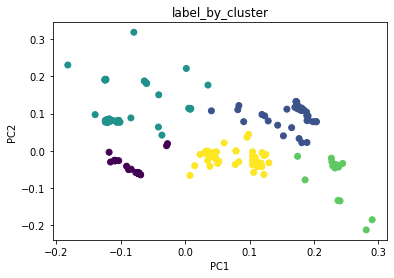

In [74]:
#plot graph 1
plt.scatter(totalPCA[:, 0], totalPCA[:, 1], c=totalLabel)
plt.title("label_by_cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

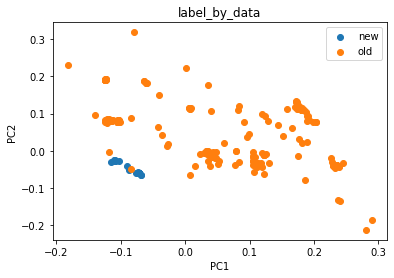

In [75]:
#plot graph 2
plt.scatter(totalPCA[:158, 0], totalPCA[:158, 1], label="new")
plt.scatter(totalPCA[158:, 0], totalPCA[158:, 1], label="old")
plt.title("label_by_data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()